# Redes neuronales artificiales

Durante las últimas clases haremos una exploración sobre varias técnicas de aprendizaje profundo (deep learning) comenzando con las redes neuronales artificiales (ANN), en particular las redes neuronales Feedforward. 

Usaremos el framework Keras, que es una API de alto nivel además de Tensorflow. Keras se está volviendo muy popular recientemente debido a su simplicidad. Es muy fácil crear modelos complejos e iterar rápidamente. 

## Introducción

Las redes neuronales artificiales (ANN) son redes neuronales conformadas por varias capas de neuronas totalmente conectadas:

![img1](https://raw.githubusercontent.com/Izainea/visualizacion/master/img/ANN1.png)


Consisten en una capa de entrada, varias capas ocultas y una capa de salida. Cada nodo de una capa está conectado a todos los demás nodos de la siguiente capa. Representa lo que estudiamos hace un momento, el perceptrón:

![img2](https://raw.githubusercontent.com/Izainea/visualizacion/master/img/ANN2.png)

Después de que cada perceptrón aplica los pesos obtenidos y se tiene la salida después de aplicar la función de activación entonces cada salida se convierte en la entrada para la siguiente capa. Los cálculos fluyen el diagrama de izquierda a derecha y la salida final se calcula realizando este procedimiento para todos los nodos. 

El objetivo de esta red neuronal profunda es aprender los pesos asociados a cada flecha de la primera gráfica, en otras palabras, consiste en la estimación de las siguientes matrices:

![img3](https://raw.githubusercontent.com/Izainea/visualizacion/master/img/ANN3.png)

En ese sentido, aprovechando el gráfico anterior, entendemos que la salida, para la red representada en esa figura, se calcula de la siguiente forma:

$$y=f(f(f(x\cdot W_1)\cdot W_2)\cdot W_3)$$

En este caso, todos los perceptrones tienen la misma función de activación $f$. El sesgo no esta incluido en la fórmula anterior, pero podemos ignorarlo mientras concebimos la intuición detrás de estas redes neuronales.

## Backpropagation 
Hasta ahora hemos descrito el cálculo de la salida a partir de unos pesos estimados pero ¿Cómo estimamos estos pesos?, en otras palabras, ¿Cómo entrenamos esta red? 

El siguiente algoritmo describe este proceso:

* Inicialice aleatoriamente los pesos de todos los nodos. 

* La salida final es el valor del último nodo. Compare la salida final con el objetivo real en los datos de entrenamiento y mida el error usando una función de pérdida (Loss function).

* Realice un pase hacia atrás de derecha a izquierda y propague el error a cada nodo individual utilizando la propagación hacia atrás. * Calcule la contribución de cada peso al error y ajuste los pesos en consecuencia utilizando el descenso de gradiente. Propague los gradientes de error a partir de la última capa.

La propagación hacia atrás con descenso de gradiente es el concepto fundamental detrás del entrenamiento de la red, en esencia buscamos minimizar el error y en ese sentido buscamos un valor mínimo de la función de pérdida. Los detalles matemáticos los omitiremos de esta explicación pero se pueden encontrar en este video:
[![imgvid](https://img.youtube.com/vi/9OzLcgy1bjs/0.jpg)](https://www.youtube.com/watch?v=9OzLcgy1bjs)



## ¿Por qué funcionan las redes?

La esencia de las redes neuronales, por lo menos en esta versión inicial, consiste en la posibilidad de proyectar-transformar los registros de entrada en un espacio con mayor dimensión, con eso el proceso de clasificación se hace más sencillo, el siguiente gráfico ilustra esta situación:

![img4](https://raw.githubusercontent.com/Izainea/visualizacion/master/img/ANN4.png)

La proyección a otra dimensión permitió que hicieramos una separación como la siguiente:

![img5](https://raw.githubusercontent.com/Izainea/visualizacion/master/img/ANN5.png)

En resumen, las ANN son modelos de aprendizaje profundo muy flexibles pero potentes, permiten estimar aproximaciones a cualquier función compleja. Su aumento de popularidad se ha debido a tres razones: trucos inteligentes que hicieron posible el entrenamiento de estos modelos, un gran aumento en la potencia computacional, especialmente GPU y entrenamiento distribuido, además de una gran cantidad de datos de entrenamiento.





## Implementación en Python

Vamos ahora a usar el framework `keras` para hacer algunas  clasificaciones. Iniciemos con lo que necesitamos para poder iniciar el desarrollo de los modelos:

In [3]:
!pip install keras

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import seaborn as sns
import warnings

#warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)


from datetime import datetime
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
import keras.backend as K
from keras.wrappers.scikit_learn import KerasClassifier

`make_classification` es una función que nos permite simular un data set para clasificar:

<AxesSubplot:>

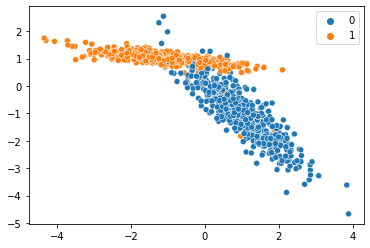

In [9]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                           n_informative=2, random_state=2020, n_clusters_per_class=1)
sns.scatterplot(x=X.T[0],y=X.T[1],hue=y)

Antes de usar `keras` veamos un clasificador lineal, la regresión logística, compararemos después como clasifica una red neuronal:

<AxesSubplot:>

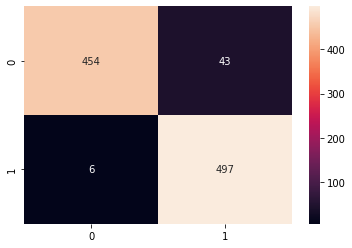

In [10]:
lr = LogisticRegression()
lr.fit(X, y)
y_pred=lr.predict(X)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='.0f')

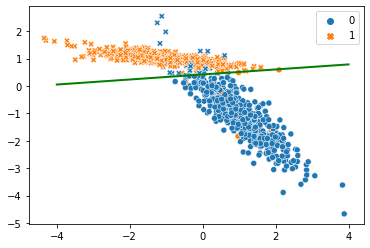

In [11]:
sns.scatterplot(x=X.T[0],y=X.T[1],hue=y,style=y_pred)
limits = np.array([-4, 4])
boundary = -(lr.coef_[0][0] * limits + lr.intercept_[0]) / lr.coef_[0][1]
plt.plot(limits, boundary, "g-", linewidth=2)

Ahora veamos que ocurre con `keras`, despleguemos el modelo de clasificación usando la sintaxis de keras, la documentación se puede encontrar aquí:
[Documentación Keras](https://keras.io/)

In [33]:
model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x=X, y=y, verbose=0, epochs=500)


In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [35]:
y_pred=np.round(model.predict(X))

<AxesSubplot:>

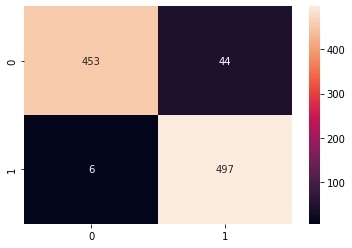

In [36]:
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='.0f')

In [37]:
history.history

{'loss': [0.9387906789779663,
  0.8992305397987366,
  0.8612684607505798,
  0.8257588744163513,
  0.7924758791923523,
  0.7607945799827576,
  0.7313790917396545,
  0.7035643458366394,
  0.6776264309883118,
  0.6533573269844055,
  0.6308846473693848,
  0.6099210381507874,
  0.5904901027679443,
  0.5723855495452881,
  0.5555389523506165,
  0.5396062731742859,
  0.5246429443359375,
  0.5108802914619446,
  0.4980844557285309,
  0.48609691858291626,
  0.4748263955116272,
  0.4642535150051117,
  0.4544048011302948,
  0.44507843255996704,
  0.43642306327819824,
  0.4281095862388611,
  0.42035090923309326,
  0.41315552592277527,
  0.40614408254623413,
  0.3995928466320038,
  0.3934169411659241,
  0.38753002882003784,
  0.3818916976451874,
  0.37660112977027893,
  0.371547132730484,
  0.3667638599872589,
  0.3622294068336487,
  0.3579007089138031,
  0.35375455021858215,
  0.34984198212623596,
  0.34613969922065735,
  0.34257981181144714,
  0.3390897214412689,
  0.33588239550590515,
  0.33273497

<Figure size 576x432 with 0 Axes>

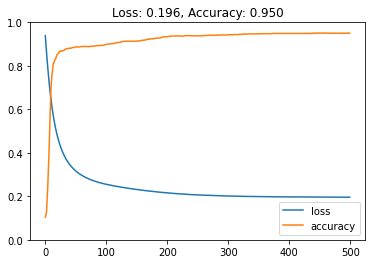

In [38]:
def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))
plot_loss_accuracy(history)

In [44]:
model = Sequential()
model.add(Dense(units=10, input_shape=(2,), activation='sigmoid'))
model.add(Dense(units=10, input_shape=(10,), activation='sigmoid'))
model.add(Dense(units=1, input_shape=(10,), activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x=X, y=y, verbose=0, epochs=500)


In [45]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

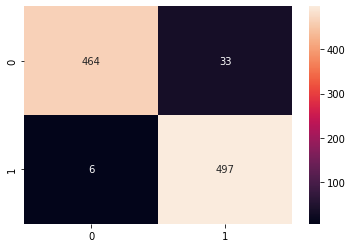

In [46]:
y_pred=np.round(model.predict(X))
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='.0f')

<Figure size 576x432 with 0 Axes>

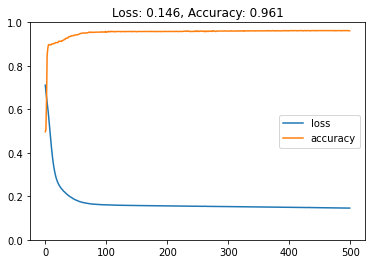

In [47]:
plot_loss_accuracy(history)

<AxesSubplot:>

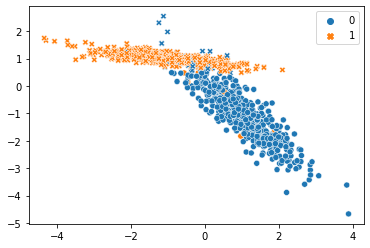

In [48]:
sns.scatterplot(x=X.T[0],y=X.T[1],hue=y,style=y_pred.T[0])